<a href="https://colab.research.google.com/github/Shadoww002/PyTorch-Learning/blob/main/Chapter%201%20%E2%80%93%20PyTorch%20Workflow/Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch import nn


In [41]:
## create known parameters
weight = 0.75
bias = 0.25

In [42]:
## create known data
start = 0
end = 1
step = 0.01

X = torch.arange(start ,end, step).unsqueeze(dim=1)
y = X * weight + bias

X[:6] ,y[:6]


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500]]),
 tensor([[0.2500],
         [0.2575],
         [0.2650],
         [0.2725],
         [0.2800],
         [0.2875]]))

In [43]:
len(X) , len(y)

(100, 100)

In [44]:
## Training and Testing split of data
train_split = int(0.8 * len(X))
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

len(X_train),len(X_test) , len(y_train) , len(y_test)

(80, 20, 80, 20)

In [45]:
## building a plotting function
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels, c="b" , s=5 ,label="Training data")

  plt.scatter(test_data ,test_labels , c="g" , s=5 , label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data , predictions, c="r" , s=5 , label ="Predictions")

  plt.legend()

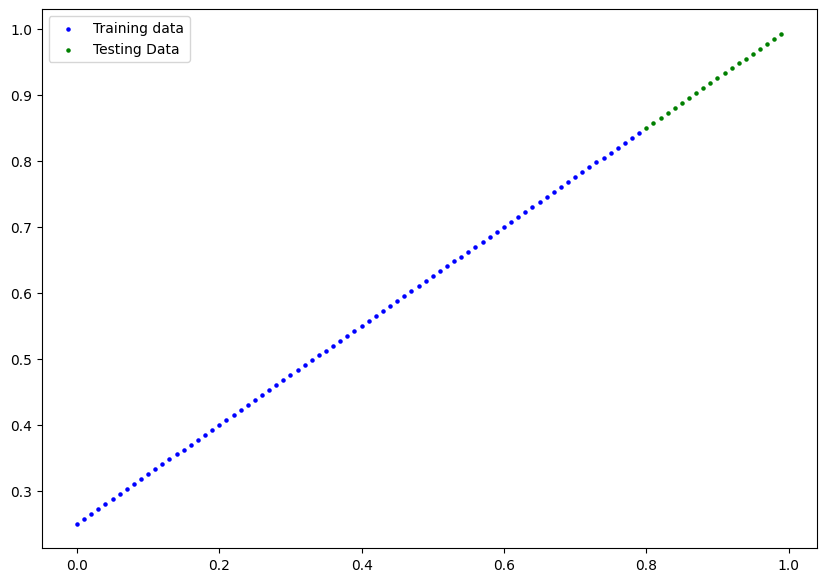

In [46]:
plot_predictions()

In [47]:
## Building First Model using PyTorch i.e Linear Regression

from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                           requires_grad =True,
                                           dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))

  def forward(self , x:torch.tensor)-> torch.Tensor :
      return self.weight * x + self.bias

In [48]:
## PyTorch Model Building Essentials

# torch.nn -> contains all of the building for computational graphs(a neural network can be considered a computational graph)
# torch.nn.parameter -> what parameter should our model try and learn ,often pytorch layer from torch.nn will set these of us
# torch.nn.Module -> The Base class for all neural network moduls
# torch.optim -> this is where optimisers in pytorch live
# def forward() -> all nn.Module subclass requires ypu to overwrite forward() , this method defines what happens in the forward computation

In [49]:
torch.manual_seed(33)

# creating an instance of the model
model_0 = LinearRegressionModel()

#checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [50]:
model_0.state_dict()


OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [51]:
## Making Predictions
# y_pred = model_0(X_test);
# y_pred

# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

In [52]:
y_preds

tensor([[0.5587],
        [0.5707],
        [0.5827],
        [0.5947],
        [0.6067],
        [0.6186],
        [0.6306],
        [0.6426],
        [0.6546],
        [0.6666],
        [0.6785],
        [0.6905],
        [0.7025],
        [0.7145],
        [0.7265],
        [0.7385],
        [0.7504],
        [0.7624],
        [0.7744],
        [0.7864]])

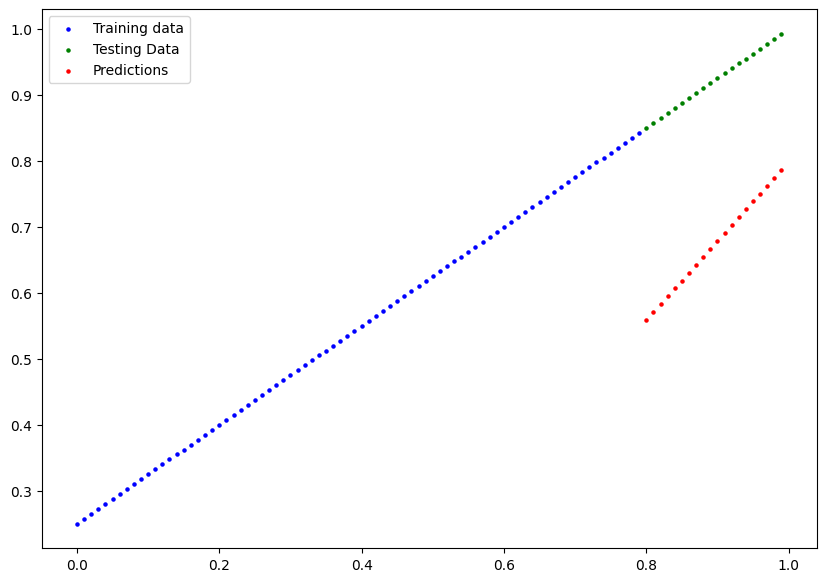

In [53]:
# y_pred.detach().numpy()
plot_predictions(predictions = y_preds)

In [54]:
list(model_0.parameters())

[Parameter containing:
 tensor([1.1982], requires_grad=True),
 Parameter containing:
 tensor([-0.3998], requires_grad=True)]

In [55]:
model_0.state_dict()

OrderedDict([('weight', tensor([1.1982])), ('bias', tensor([-0.3998]))])

In [56]:
## Setting The Loss Functions
loss_fn = nn.L1Loss()


## Setting the Optimisers
optimiser = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01)

In [57]:
torch.manual_seed(42)
## Training LOOP
epoch_count = []
train_loss_count = []
test_loss_count = []

epochs = 400
for epoch in range(epochs):
  # ste model to training mode
  model_0.train()

  #forward pass
  y_pred = model_0(X_train)

  #calculate the Loss
  loss = loss_fn(y_pred , y_train)

  # optimiser zero grad
  optimiser.zero_grad()

  #perform the backpropogation in the loss wrt parameter of the model
  loss.backward()

  #step the optimiser(perform gradient descent)
  optimiser.step()


  ## Testing Loop
  model_0.eval()

  with torch.inference_mode():
    # do the forward pass for testing data
    test_pred = model_0(X_test)
    #calculate the loss
    test_loss = loss_fn(test_pred , y_test)

  if(epoch % 10 == 0):
    print(f"epoch : {epoch} | loss : {loss} | Test_Loss : {test_loss}")
    epoch_count.append(epoch)
    train_loss_count.append(loss)
    test_loss_count.append(test_loss)


  # print(loss)
  # print(model_0.state_dict())

epoch : 0 | loss : 0.47279223799705505 | Test_Loss : 0.23516178131103516
epoch : 10 | loss : 0.3571898341178894 | Test_Loss : 0.09980936348438263
epoch : 20 | loss : 0.24158735573291779 | Test_Loss : 0.03842427209019661
epoch : 30 | loss : 0.15754380822181702 | Test_Loss : 0.14258940517902374
epoch : 40 | loss : 0.13025596737861633 | Test_Loss : 0.1957685649394989
epoch : 50 | loss : 0.11914428323507309 | Test_Loss : 0.2223103791475296
epoch : 60 | loss : 0.11316206306219101 | Test_Loss : 0.2343481034040451
epoch : 70 | loss : 0.10886026918888092 | Test_Loss : 0.23786218464374542
epoch : 80 | loss : 0.10514986515045166 | Test_Loss : 0.23646409809589386
epoch : 90 | loss : 0.10163762420415878 | Test_Loss : 0.23227830231189728
epoch : 100 | loss : 0.09817015379667282 | Test_Loss : 0.22601506114006042
epoch : 110 | loss : 0.0947430357336998 | Test_Loss : 0.21836693584918976
epoch : 120 | loss : 0.09131591022014618 | Test_Loss : 0.21071882545948029
epoch : 130 | loss : 0.08788881450891495 

In [58]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [59]:
model_0.state_dict()#initial random paramerter wihtod  training loop

OrderedDict([('weight', tensor([0.7593])), ('bias', tensor([0.2557]))])

In [60]:
weight ,bias # original params

(0.75, 0.25)

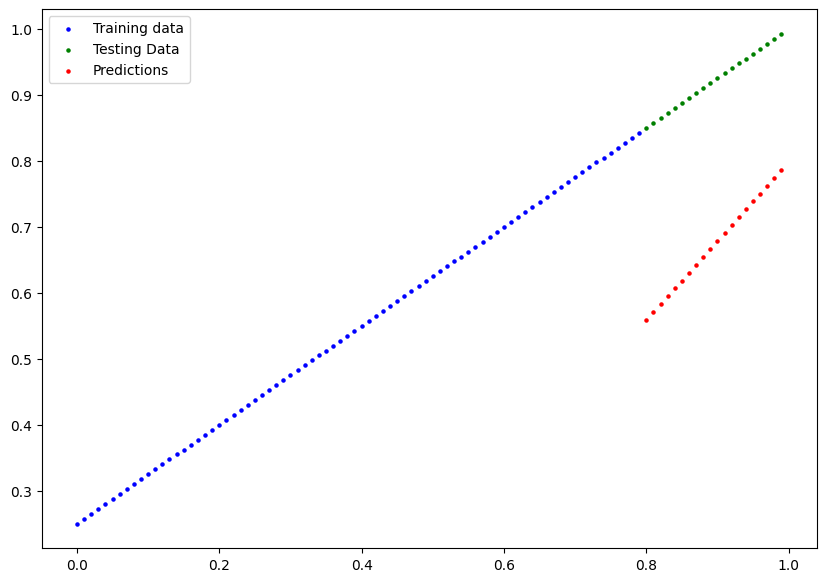

In [61]:
plot_predictions(predictions=y_preds)

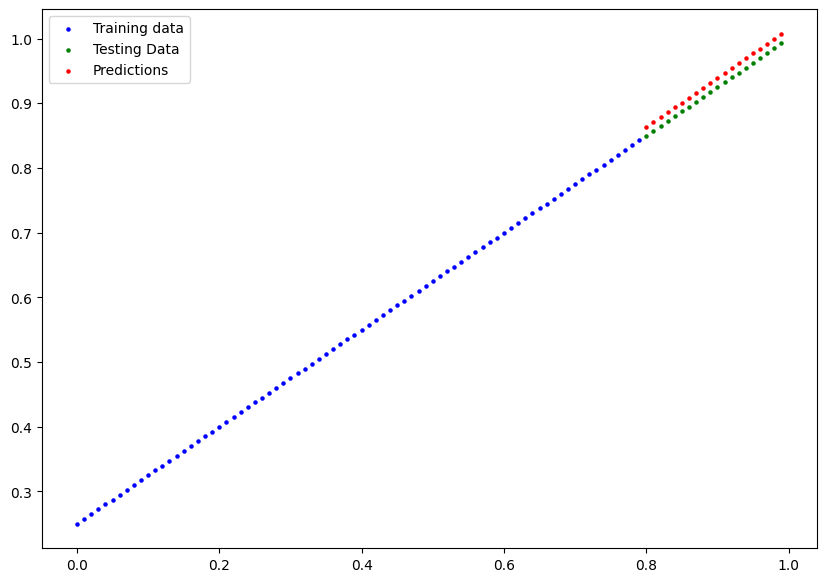

In [62]:
plot_predictions(predictions=y_preds_new)

In [63]:
epoch_count[:10] ,train_loss_count[:10],test_loss_count[:10]

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.4728, grad_fn=<MeanBackward0>),
  tensor(0.3572, grad_fn=<MeanBackward0>),
  tensor(0.2416, grad_fn=<MeanBackward0>),
  tensor(0.1575, grad_fn=<MeanBackward0>),
  tensor(0.1303, grad_fn=<MeanBackward0>),
  tensor(0.1191, grad_fn=<MeanBackward0>),
  tensor(0.1132, grad_fn=<MeanBackward0>),
  tensor(0.1089, grad_fn=<MeanBackward0>),
  tensor(0.1051, grad_fn=<MeanBackward0>),
  tensor(0.1016, grad_fn=<MeanBackward0>)],
 [tensor(0.2352),
  tensor(0.0998),
  tensor(0.0384),
  tensor(0.1426),
  tensor(0.1958),
  tensor(0.2223),
  tensor(0.2343),
  tensor(0.2379),
  tensor(0.2365),
  tensor(0.2323)])

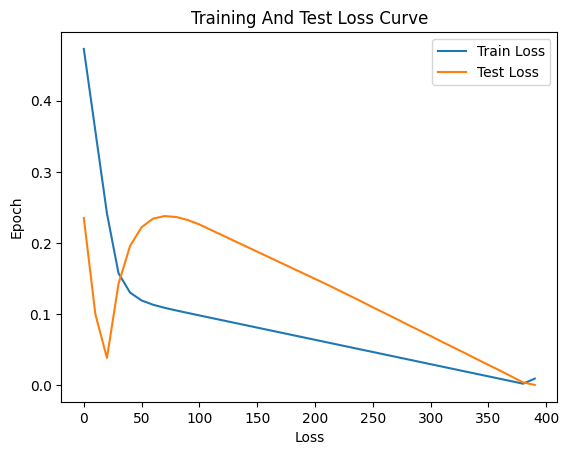

In [64]:
## Plotting The Loss Curves

plt.plot(epoch_count ,torch.tensor(train_loss_count).numpy() , label="Train Loss")
plt.plot(epoch_count , test_loss_count , label="Test Loss")
plt.title("Training And Test Loss Curve")
plt.xlabel("Loss")
plt.ylabel("Epoch")
plt.legend()


In [65]:
!pip install pathlib

In [70]:
## Saving the Model
from pathlib import Path

#creat model directory
Model_Path = Path("models")
Model_Path.mkdir(parents=True , exist_ok=True)

#model save path

Model_name = "workflow_model_0.pth"
Model_save_path = Model_Path/Model_name

# save the model state dict

print(f"Saving Model at: {Model_save_path}")
torch.save(model_0.state_dict(),Model_save_path)


Saving Model at: models/workflow_model_0.pth


In [71]:
## Loading A saved Model

# To load a saved state dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

In [72]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.2345])), ('bias', tensor([0.2303]))])

In [73]:
loaded_model_0.load_state_dict(torch.load(f=Model_save_path ,
                                           weights_only=False))

<All keys matched successfully>

In [74]:
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.7593])), ('bias', tensor([0.2557]))])

In [76]:
## making predictions with loaded model
loaded_model_0.eval()
with torch.inference_mode():
  y_preds_loaded = loaded_model_0(X_test)
y_preds_loaded

tensor([[0.8631],
        [0.8707],
        [0.8783],
        [0.8859],
        [0.8935],
        [0.9011],
        [0.9087],
        [0.9163],
        [0.9239],
        [0.9315],
        [0.9391],
        [0.9467],
        [0.9543],
        [0.9619],
        [0.9695],
        [0.9770],
        [0.9846],
        [0.9922],
        [0.9998],
        [1.0074]])

In [77]:
model_0.eval()
with torch.inference_mode():
  y_preds = loaded_model_0(X_test)
y_preds

tensor([[0.8631],
        [0.8707],
        [0.8783],
        [0.8859],
        [0.8935],
        [0.9011],
        [0.9087],
        [0.9163],
        [0.9239],
        [0.9315],
        [0.9391],
        [0.9467],
        [0.9543],
        [0.9619],
        [0.9695],
        [0.9770],
        [0.9846],
        [0.9922],
        [0.9998],
        [1.0074]])

In [78]:
y_preds == y_preds_loaded

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])